In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the dataset
df = pd.read_csv('data/raw.csv')

# Display first few rows
df.head()


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Placed


In [6]:
# Shape and basic info
print("Shape of the dataset:", df.shape)
print("\nDataset Info:")
df.info()


Shape of the dataset: (215, 11)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    215 non-null    object 
 1   ssc_p     215 non-null    float64
 2   ssc_b     215 non-null    object 
 3   hsc_p     215 non-null    float64
 4   hsc_b     215 non-null    object 
 5   hsc_s     215 non-null    object 
 6   degree_p  215 non-null    float64
 7   degree_t  215 non-null    object 
 8   workex    215 non-null    object 
 9   etest_p   215 non-null    float64
 10  status    215 non-null    object 
dtypes: float64(4), object(7)
memory usage: 18.6+ KB


In [7]:
# Summary statistics for numerical columns
df.describe()


,ssc_p,hsc_p,degree_p,etest_p
count,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558
std,10.827205,10.897509,7.358743,13.275956
min,40.890000,37.000000,50.000000,50.000000
25%,60.600000,60.900000,61.000000,60.000000
50%,67.000000,65.000000,66.000000,71.000000
75%,75.700000,73.000000,72.000000,83.500000
max,89.400000,97.700000,91.000000,98.000000


In [8]:
# Check for missing values
print("Missing Values:\n")
print(df.isnull().sum())


Missing Values:

gender      0
ssc_p       0
ssc_b       0
hsc_p       0
hsc_b       0
hsc_s       0
degree_p    0
degree_t    0
workex      0
etest_p     0
status      0
dtype: int64


In [9]:
# Check unique values in categorical columns
categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'status']
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for gender:
gender
M    139
F     76
Name: count, dtype: int64

Value counts for ssc_b:
ssc_b
Central    116
Others      99
Name: count, dtype: int64

Value counts for hsc_b:
hsc_b
Others     131
Central     84
Name: count, dtype: int64

Value counts for hsc_s:
hsc_s
Commerce    113
Science      91
Arts         11
Name: count, dtype: int64

Value counts for degree_t:
degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64

Value counts for workex:
workex
No     141
Yes     74
Name: count, dtype: int64

Value counts for status:
status
Placed        148
Not Placed     67
Name: count, dtype: int64


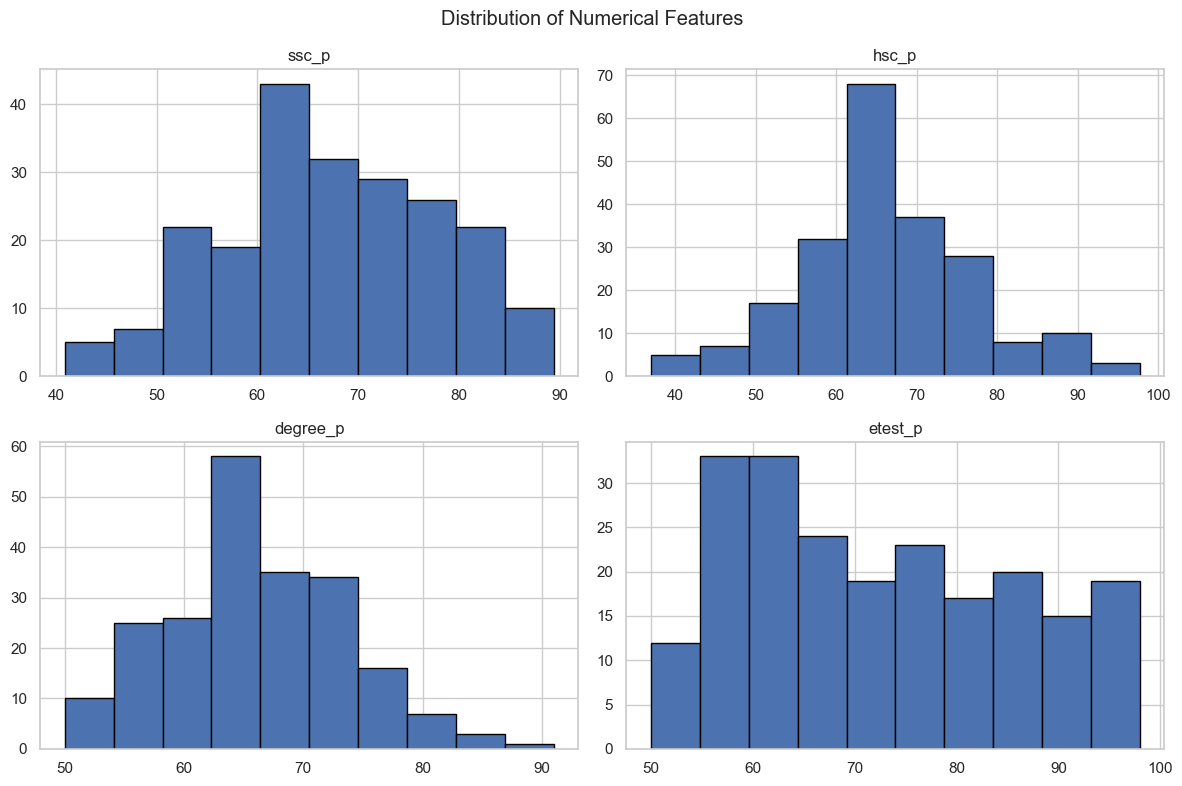

In [10]:
# Plot distributions of numerical features
num_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p']
df[num_cols].hist(figsize=(12, 8), bins=10, edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()


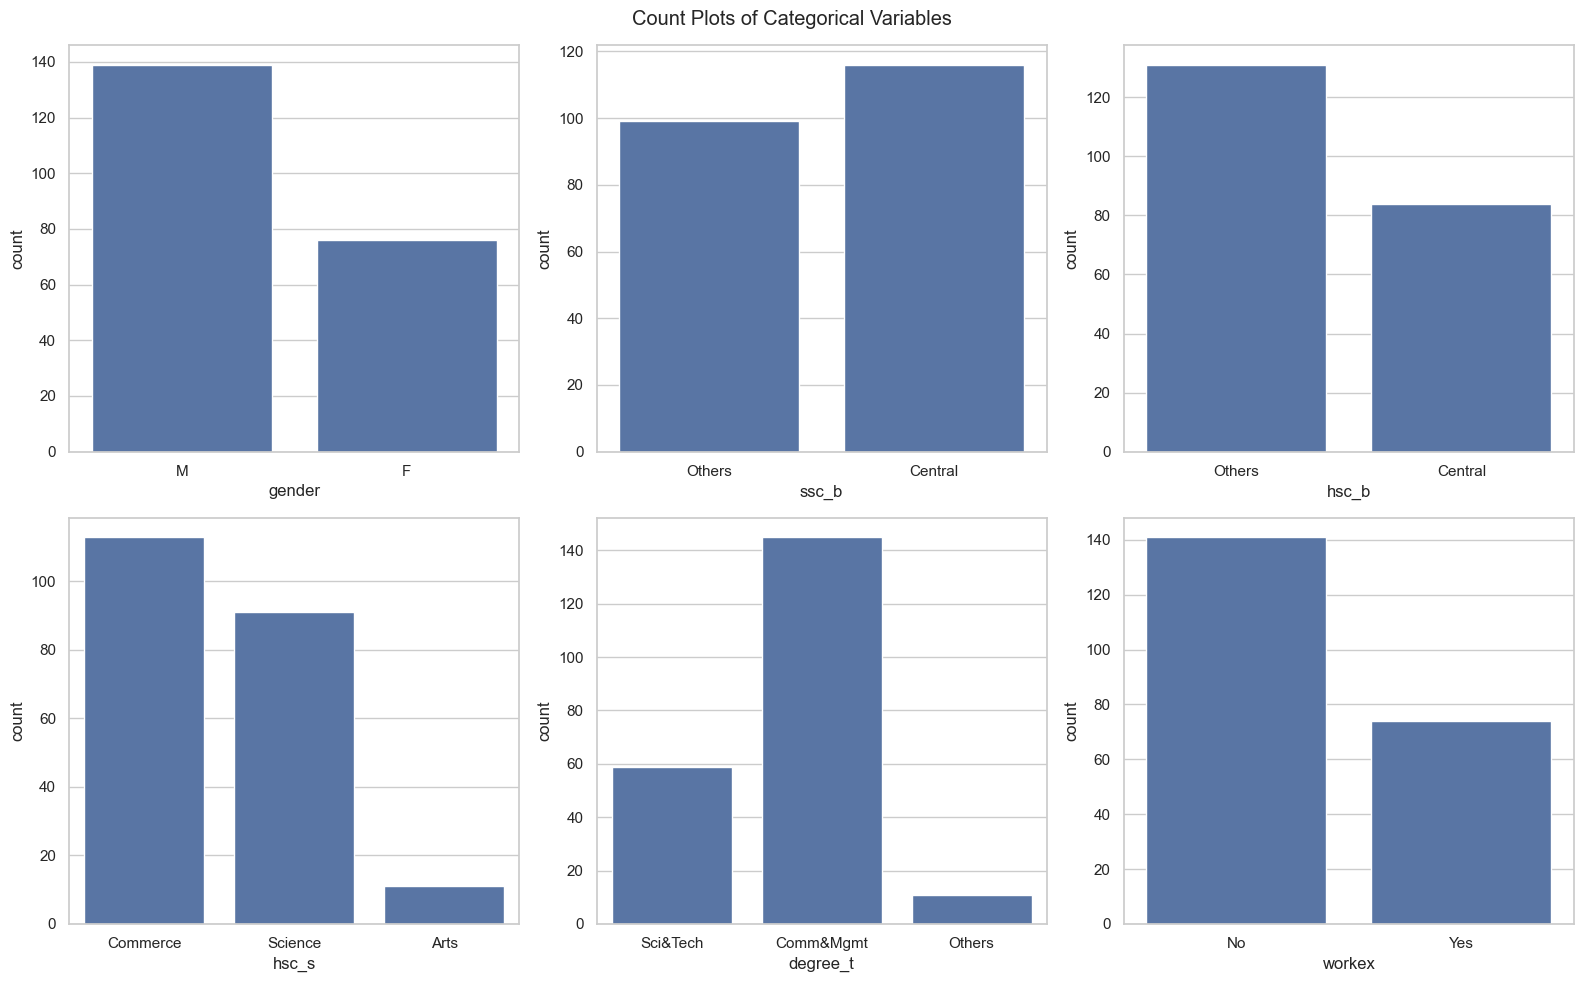

In [11]:
# Count plots for categorical variables
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
sns.countplot(x='gender', data=df, ax=axes[0, 0])
sns.countplot(x='ssc_b', data=df, ax=axes[0, 1])
sns.countplot(x='hsc_b', data=df, ax=axes[0, 2])
sns.countplot(x='hsc_s', data=df, ax=axes[1, 0])
sns.countplot(x='degree_t', data=df, ax=axes[1, 1])
sns.countplot(x='workex', data=df, ax=axes[1, 2])
plt.suptitle("Count Plots of Categorical Variables")
plt.tight_layout()
plt.show()


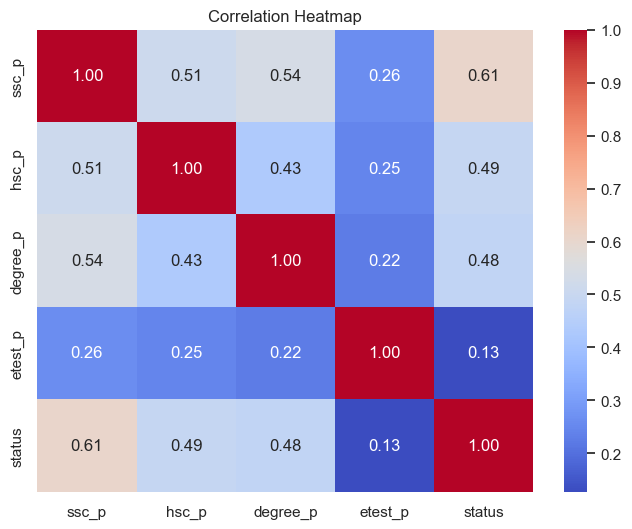

In [14]:
# Make a copy
df_corr = df.copy()

# Encode the target
df_corr['status'] = df_corr['status'].map({'Placed': 1, 'Not Placed': 0})

# Drop all non-numeric columns (except the encoded 'status')
df_corr = df_corr.drop(columns=['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex'])

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



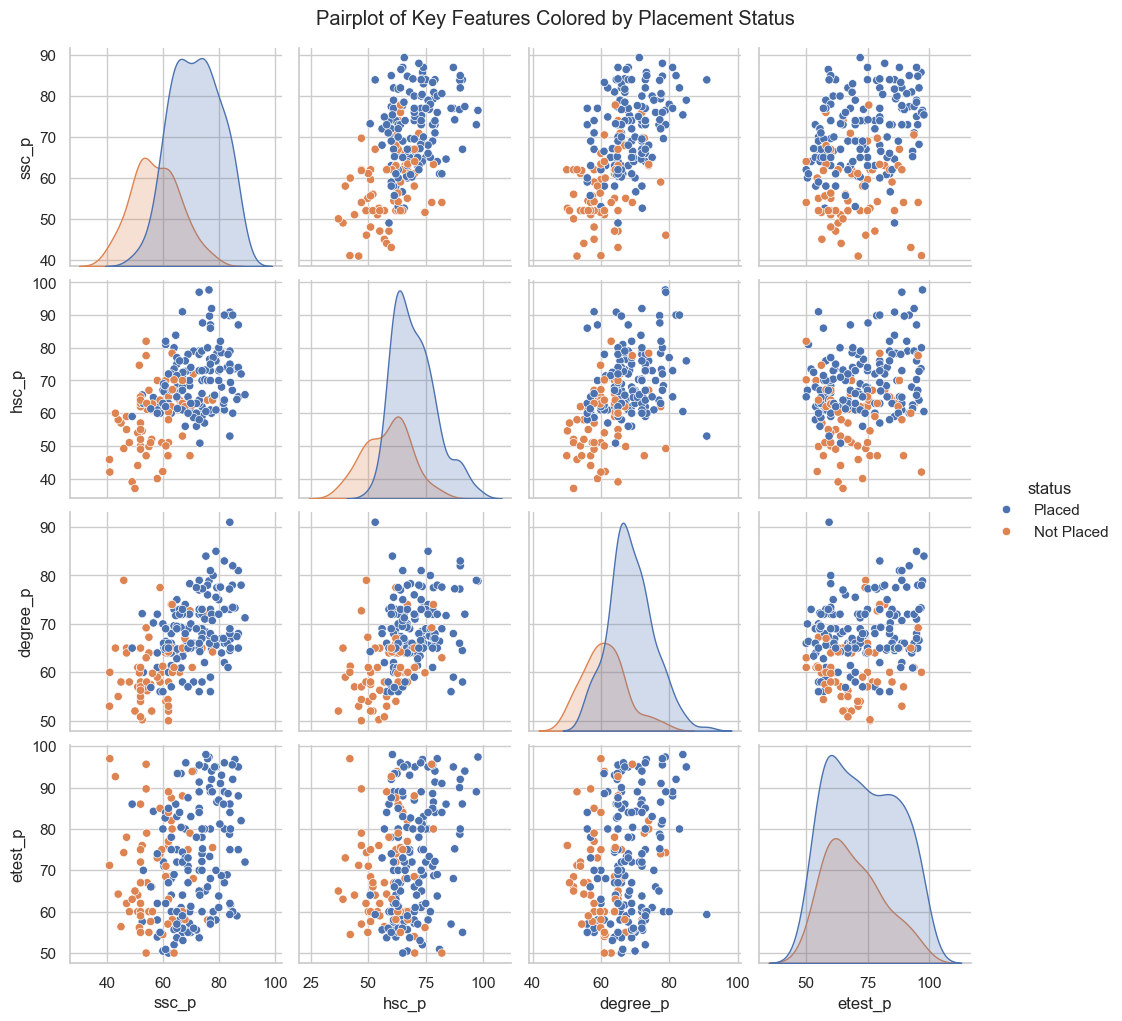

In [13]:
# Pairplot for a few features
sns.pairplot(df, hue="status", vars=['ssc_p', 'hsc_p', 'degree_p', 'etest_p'])
plt.suptitle("Pairplot of Key Features Colored by Placement Status", y=1.02)
plt.show()
